In [1]:

import tensorflow as tf
print(tf.__version__)



2.14.0


## Autoencoder
 ### Flow 
#### Input Image(noisy Image) -> Encoder -> Compressed Representation-> Decoder-> Reconstruct Input Clear Image


In [2]:
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Conv2D , MaxPooling2D, UpSampling2D

from tensorflow.keras.models import Sequential
from PIL import Image
import numpy as np
import os
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tqdm import tqdm

import matplotlib.pyplot as plt


(512, 512)


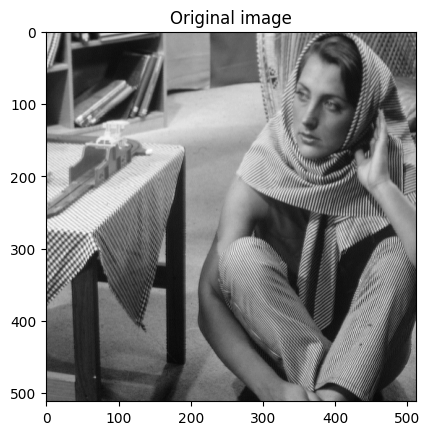

In [3]:
#load image

# Read an image
im = np.array(Image.open('barbara.png'))
#im = img_as_float(im)
# im = np.array(Image.open('misc\\brain4.jpg'))
print(im.shape)
# Show the image
plt.figure(0)
plt.imshow(im,'gray') 
plt.title('Original image')
plt.show()

(512, 512)


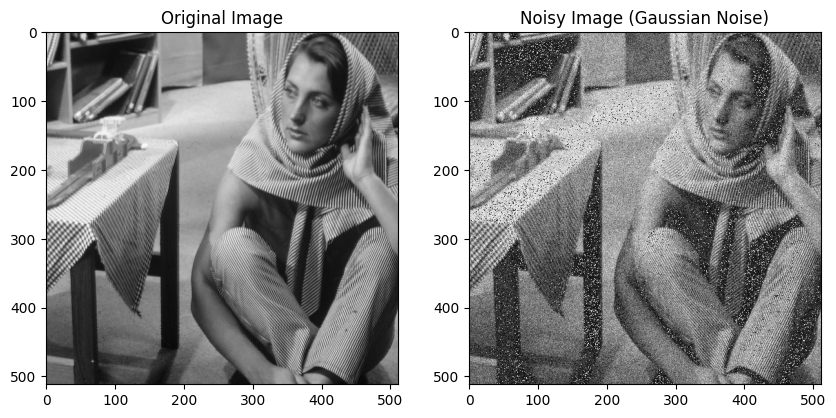

In [4]:
#Add noise

# Parameters for Gaussian noise
mean = 0
stddev = 25  # You can adjust this to control the amount of noise

# Generate Gaussian noise with the same shape as the image
noise = np.random.normal(mean, stddev, im.shape).astype(np.uint8)

# Add the noise to the image
noisy_image = np.clip(im + noise, 0, 255).astype(np.uint8)

# Show the original and noisy images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.title('Original Image')
print(noisy_image.shape)
# Noisy image
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Gaussian Noise)')

plt.show()

In [5]:
np.random.seed(42)

SIZE = 512
im=cv2.resize(im,(SIZE,SIZE))
im= img_to_array(im)

img = cv2.resize(noisy_image,(SIZE,SIZE))

noisy_image= img_to_array(img)

#print(noisy_image.shape)

#print(im.shape)

#The Size is 320, 320 ,1 . The 1 stands for gray channel

#noisy_train = np.reshape(noisy_image,(len(noisy_image),SIZE,SIZE,1))
noisy_train = np.reshape(noisy_image, (SIZE, SIZE, 1))
noisy_train = noisy_train.astype('float32') / 255

clean_train = np.reshape(im, (SIZE, SIZE, 1))
clean_train = clean_train.astype('float32') / 255
#print(noisy_train)




In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

tf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 256, 256, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 128, 128, 8)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 8)       584       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 8)         0

<module 'tensorflow' from 'C:\\Users\\gyard\\anaconda3\\envs\\myenv\\lib\\site-packages\\tensorflow\\__init__.py'>

In [7]:
from tensorflow import keras

In [10]:
# test and train data 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(noisy_train, clean_train,  test_size = 0.20, random_state = 0)


In [9]:
#log_dir="logs/fit/"

#tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x_train, y_train, epochs=5, batch_size=1, shuffle=True, verbose = 1, validation_split = 0.1,callbacks=[tensorboard_callback])


print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(x_test), np.array(y_test))[1]*100))


#model.save('denoising_autoencoder.model')

no_noise_img = model.predict(x_test)

expected_size = 512 * 512

# Check if the size of no_noise_img matches the expected size
if no_noise_img.size == expected_size:
    # Reshape the array
    reshaped_img = no_noise_img.reshape(320, 320)
    plt.imshow(reshaped_img, cmap="gray")
    plt.show()
else:
    print(f"The size of no_noise_img ({no_noise_img.size}) does not match the expected size ({expected_size}).")


#plt.imshow(no_noise_img.reshape(SIZE,SIZE), cmap="gray")
# #plt.imsave('sandstone/denoised_images/denoised_image.tif', no_noise_img[3].reshape(SIZE,SIZE))

# """

Epoch 1/5
368/368 [==============================] - 5s 10ms/step - loss: 0.0266 - accuracy: 0.0000e+00 - val_loss: 0.0079 - val_accuracy: 0.0000e+00
Epoch 2/5
368/368 [==============================] - 4s 10ms/step - loss: 0.0072 - accuracy: 0.0000e+00 - val_loss: 0.0073 - val_accuracy: 0.0000e+00
Epoch 3/5
368/368 [==============================] - 4s 10ms/step - loss: 0.0069 - accuracy: 0.0000e+00 - val_loss: 0.0068 - val_accuracy: 0.0000e+00
Epoch 4/5
368/368 [==============================] - 4s 10ms/step - loss: 0.0066 - accuracy: 0.0000e+00 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 5/5
4/4 [==============================] - 0s 33ms/step - loss: 0.0066 - accuracy: 0.0000e+00
Test_Accuracy: 0.00%
4/4 [==============================] - 0s 30ms/step
The size of no_noise_img (421888) does not match the expected size (262144).


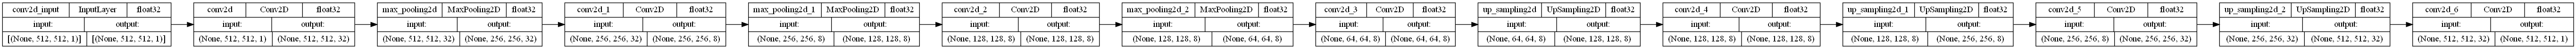

In [13]:
from tensorflow.keras.utils import plot_model

tf.keras.utils.plot_model(model, show_shapes=True,show_dtype=True,rankdir="LR")
plt.savefig("model_plot.png")  # You can change the file format as needed (e.g., .png, .jpg, .svg)

In [22]:
import tensorboard
tensorboard.__version__

'2.14.1'

In [32]:
# Clear any logs from previous runs
rm -rf ./logs/

SyntaxError: invalid syntax (335981479.py, line 2)

In [23]:
%load_ext tensorboard
%tensorboard --logdir=./logs



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 8160), started 0:12:34 ago. (Use '!kill 8160' to kill it.)